<a href="https://colab.research.google.com/github/mertylcndg/Introduction_to_Machine_Learning/blob/main/Week1_and_Week2_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the Data

In [70]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
housing_data = pd.read_csv("/content/drive/MyDrive/Data/housing.csv")

In [73]:
data = housing_data.copy()

In [74]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [76]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [77]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


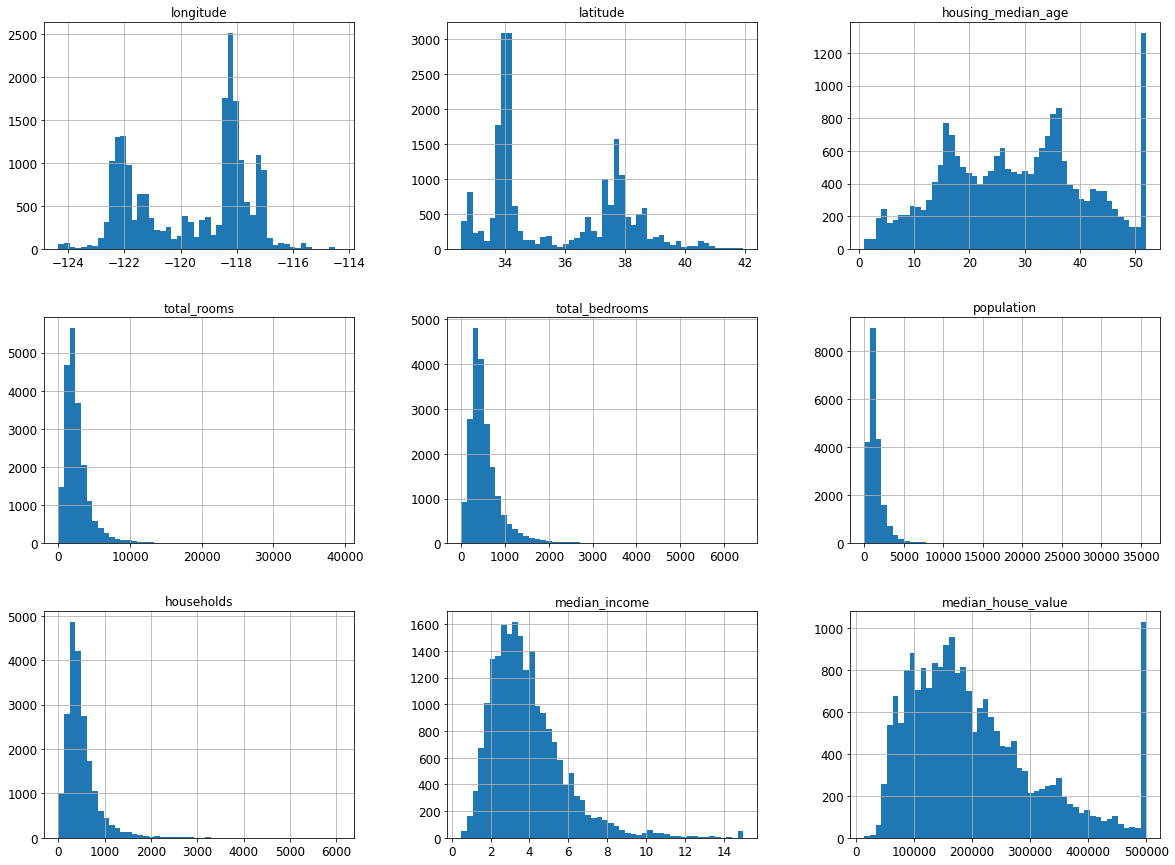

In [78]:
data.hist(bins=50,figsize=(20,15))
plt.show()

## Create a Test Set

In [79]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [80]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [81]:
train_set, test_set = split_train_test(data,0.2)
len(train_set)

16512

In [82]:
len(test_set)

4128

In [83]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [84]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


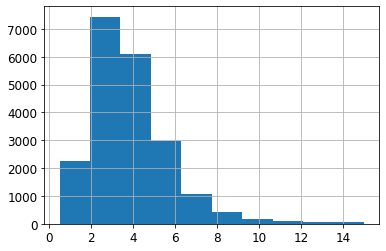

In [85]:
data.median_income.hist()

In [86]:
data["income_cat"] = pd.cut(data["median_income"],bins=[0., 1.5, 3.0, 4.0, 6., np.inf], labels=[1, 2, 3, 4, 5])

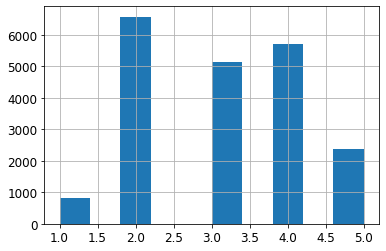

In [87]:
data.income_cat.hist()

In [88]:
data.income_cat.value_counts()

2    6581
4    5725
3    5150
5    2362
1     822
Name: income_cat, dtype: int64

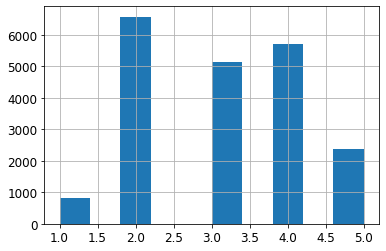

In [89]:
data["income_cat"].hist()

In [90]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [91]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

2    0.318798
4    0.277374
3    0.249516
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [92]:
data["income_cat"].value_counts() / len(data)

2    0.318847
4    0.277374
3    0.249516
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [93]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [94]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [95]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.249516,0.249516,0.256783,2.912621,0.000000
4,0.277374,0.277374,0.269138,-2.969432,0.000000
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [96]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

In [97]:
housing = strat_train_set.copy()

## Visualizing Geographical Data

In [98]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3945,-118.62,34.21,26.0,3234.0,517.0,1597.0,513.0,6.1074,258600.0,<1H OCEAN
7086,-118.00,33.93,35.0,1288.0,240.0,758.0,250.0,4.9205,173900.0,<1H OCEAN
5553,-118.37,33.95,5.0,6955.0,2062.0,3591.0,1566.0,3.1110,247600.0,<1H OCEAN
14437,-117.24,32.80,18.0,2205.0,661.0,874.0,580.0,3.8018,112500.0,NEAR OCEAN
10691,-117.72,33.63,15.0,1362.0,255.0,378.0,202.0,1.9000,162500.0,<1H OCEAN


In [99]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 3945 to 3851
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16357 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


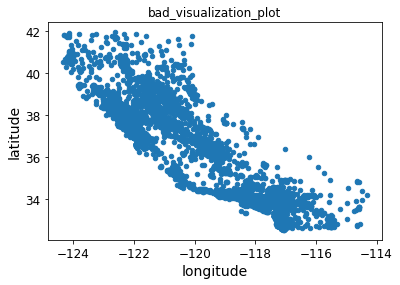

In [100]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.title("bad_visualization_plot")
plt.show()

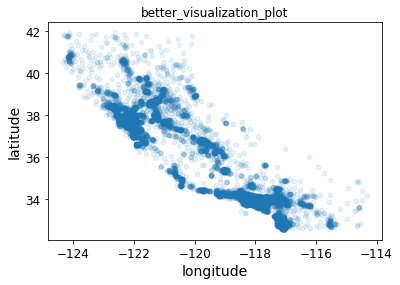

In [101]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.title("better_visualization_plot")
plt.show()

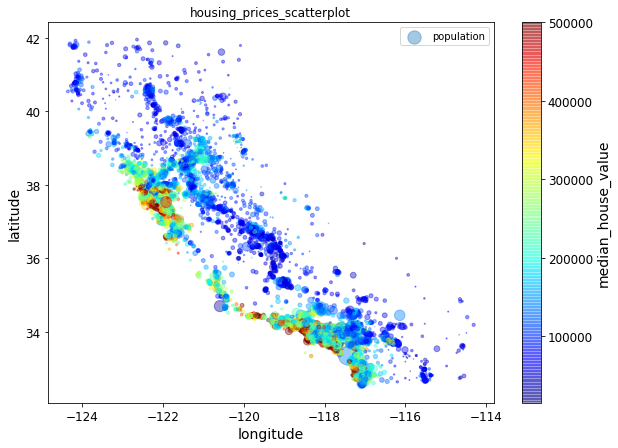

In [102]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()
plt.title("housing_prices_scatterplot")
plt.show()

In [103]:
# Download the California image
images_path = os.path.join( PROJECT_ROOT_DIR,"images", "and_to_and_project")
os.makedirs(images_path, exist_ok= True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/and_to_and_project/california.png',
 <http.client.HTTPMessage at 0x7f4e5b03f310>)

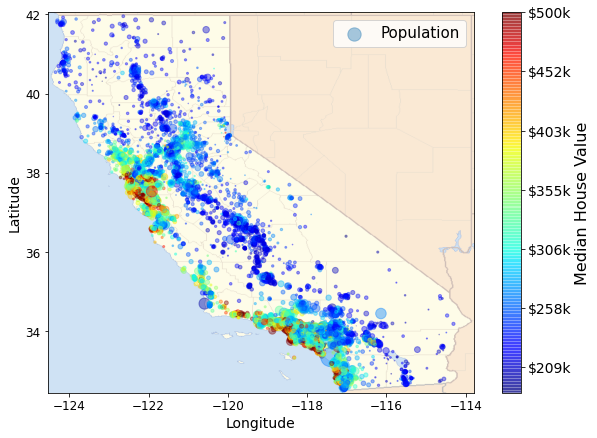

In [104]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=15)
plt.show()

# Looking for Correlation

In [105]:
corr_matrix = housing.corr() 

In [106]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924509,-0.112742,0.046833,0.074567,0.102619,0.058960,-0.018293,-0.048203
latitude,-0.924509,1.000000,0.012866,-0.036617,-0.069136,-0.110367,-0.072914,-0.077041,-0.142081
housing_median_age,-0.112742,0.012866,1.000000,-0.365078,-0.326190,-0.300671,-0.308021,-0.121587,0.107835
total_rooms,0.046833,-0.036617,-0.365078,1.000000,0.930478,0.855535,0.918570,0.202741,0.136702
total_bedrooms,0.074567,-0.069136,-0.326190,0.930478,1.000000,0.875030,0.978823,-0.003762,0.050345
population,0.102619,-0.110367,-0.300671,0.855535,0.875030,1.000000,0.906174,0.010187,-0.021021
households,0.058960,-0.072914,-0.308021,0.918570,0.978823,0.906174,1.000000,0.017379,0.067330
median_income,-0.018293,-0.077041,-0.121587,0.202741,-0.003762,0.010187,0.017379,1.000000,0.688992
median_house_value,-0.048203,-0.142081,0.107835,0.136702,0.050345,-0.021021,0.067330,0.688992,1.000000


In [107]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688992
total_rooms           0.136702
housing_median_age    0.107835
households            0.067330
total_bedrooms        0.050345
population           -0.021021
longitude            -0.048203
latitude             -0.142081
Name: median_house_value, dtype: float64

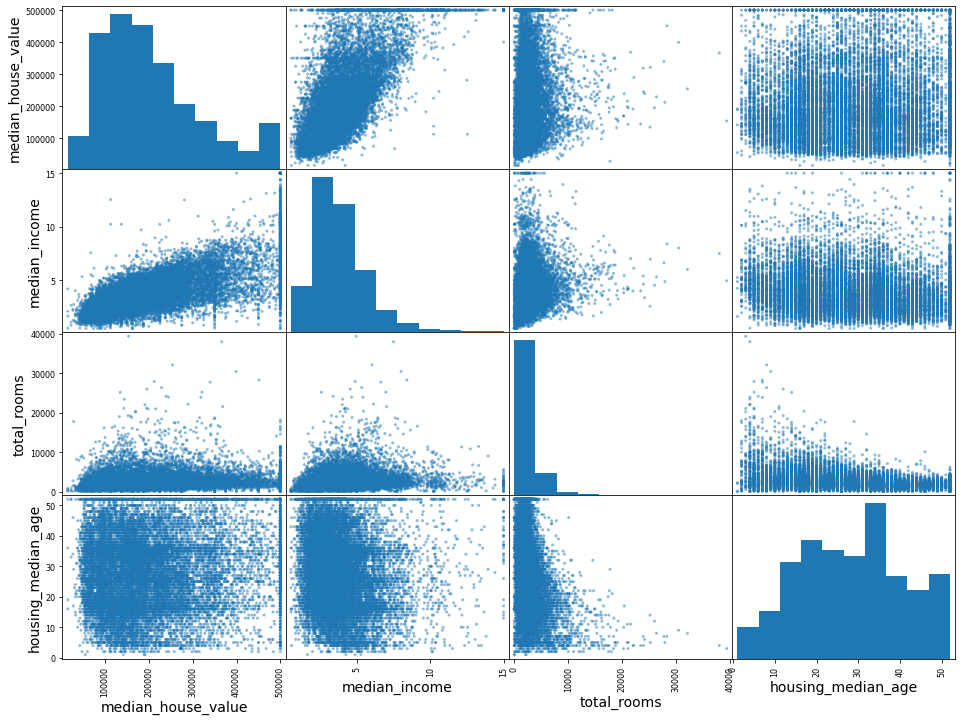

In [108]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(16,12))
plt.show()

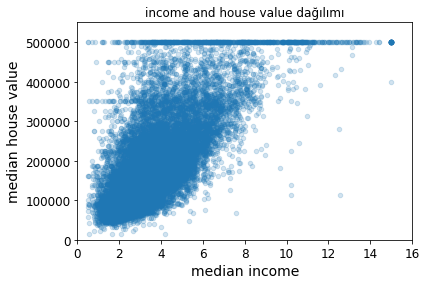

In [109]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value",alpha = 0.2)
plt.axis([0,16,0,550000])
plt.xlabel("median income")
plt.ylabel("median house value")
plt.title("income and house value dağılımı")
plt.show()

## Experimenting with Attribute Combinations


In [110]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [111]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
3945,-118.62,34.21,26.0,3234.0,517.0,1597.0,513.0,6.1074,258600.0,<1H OCEAN,6.304094,0.159864,3.113060
7086,-118.00,33.93,35.0,1288.0,240.0,758.0,250.0,4.9205,173900.0,<1H OCEAN,5.152000,0.186335,3.032000
5553,-118.37,33.95,5.0,6955.0,2062.0,3591.0,1566.0,3.1110,247600.0,<1H OCEAN,4.441252,0.296477,2.293103
14437,-117.24,32.80,18.0,2205.0,661.0,874.0,580.0,3.8018,112500.0,NEAR OCEAN,3.801724,0.299773,1.506897
10691,-117.72,33.63,15.0,1362.0,255.0,378.0,202.0,1.9000,162500.0,<1H OCEAN,6.742574,0.187225,1.871287


In [112]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688992
rooms_per_household         0.147264
total_rooms                 0.136702
housing_median_age          0.107835
households                  0.067330
total_bedrooms              0.050345
population                 -0.021021
population_per_household   -0.021529
longitude                  -0.048203
latitude                   -0.142081
bedrooms_per_room          -0.266411
Name: median_house_value, dtype: float64

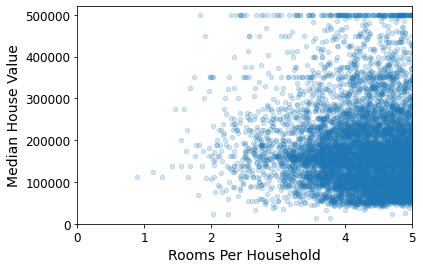

In [113]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.xlabel("Rooms Per Household")
plt.ylabel("Median House Value")
plt.show()

In [114]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,16512.0,-119.566183,2.003548,-124.350000,-121.800000,-118.495000,-118.000000,-114.310000
latitude,16512.0,35.629060,2.139462,32.540000,33.930000,34.260000,37.710000,41.950000
housing_median_age,16512.0,28.562258,12.554676,1.000000,18.000000,29.000000,37.000000,52.000000
total_rooms,16512.0,2639.429566,2189.693249,6.000000,1441.750000,2121.000000,3149.250000,39320.000000
total_bedrooms,16357.0,538.002262,421.033952,2.000000,295.000000,432.000000,647.000000,6210.000000
population,16512.0,1426.396136,1128.419407,3.000000,788.000000,1164.500000,1724.000000,35682.000000
households,16512.0,499.713784,382.407319,2.000000,280.000000,409.000000,606.000000,5358.000000
median_income,16512.0,3.869507,1.888601,0.499900,2.566950,3.540900,4.742600,15.000100
median_house_value,16512.0,206750.518047,115101.874013,14999.000000,119800.000000,179500.000000,264200.000000,500001.000000
rooms_per_household,16512.0,5.438331,2.601541,0.888889,4.439601,5.234177,6.058141,141.909091


# Prepare the Data for Machine Learning Algorithms


In [115]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [116]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3945,-118.62,34.21,26.0,3234.0,517.0,1597.0,513.0,6.1074,<1H OCEAN
7086,-118.00,33.93,35.0,1288.0,240.0,758.0,250.0,4.9205,<1H OCEAN
5553,-118.37,33.95,5.0,6955.0,2062.0,3591.0,1566.0,3.1110,<1H OCEAN
14437,-117.24,32.80,18.0,2205.0,661.0,874.0,580.0,3.8018,NEAR OCEAN
10691,-117.72,33.63,15.0,1362.0,255.0,378.0,202.0,1.9000,<1H OCEAN


In [117]:
housing_labels.head()

3945     258600.0
7086     173900.0
5553     247600.0
14437    112500.0
10691    162500.0
Name: median_house_value, dtype: float64

In [124]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 3945 to 3851
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16357 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [150]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5059,-118.35,34.01,35.0,3776.0,NaN,1583.0,749.0,3.5486,<1H OCEAN
2351,-119.68,36.79,16.0,1551.0,NaN,1010.0,292.0,3.5417,INLAND
7668,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,<1H OCEAN
16038,-122.46,37.72,39.0,2254.0,NaN,1388.0,404.0,2.9688,NEAR OCEAN
9970,-122.48,38.50,37.0,3049.0,NaN,1287.0,439.0,4.3125,INLAND


In [151]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [152]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [153]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [154]:
imputer.statistics_

array([-118.495 ,   34.26  ,   29.    , 2121.    ,  432.    , 1164.5   ,
        409.    ,    3.5409])

In [155]:
housing_num.median().values

array([-118.495 ,   34.26  ,   29.    , 2121.    ,  432.    , 1164.5   ,
        409.    ,    3.5409])

In [156]:
x = imputer.transform(housing_num)

In [157]:
housing_tr = pd.DataFrame(x, columns=housing_num.columns, index=housing.index)

In [158]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5059,-118.35,34.01,35.0,3776.0,432.0,1583.0,749.0,3.5486
2351,-119.68,36.79,16.0,1551.0,432.0,1010.0,292.0,3.5417
7668,-118.08,33.92,38.0,1335.0,432.0,1011.0,269.0,3.6908
16038,-122.46,37.72,39.0,2254.0,432.0,1388.0,404.0,2.9688
9970,-122.48,38.50,37.0,3049.0,432.0,1287.0,439.0,4.3125


In [159]:
imputer.strategy

'median'

## Handling Text and Categorical Attributes

In [160]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
3945,<1H OCEAN
7086,<1H OCEAN
5553,<1H OCEAN
14437,NEAR OCEAN
10691,<1H OCEAN
10403,<1H OCEAN
14548,NEAR OCEAN
3592,<1H OCEAN
2694,INLAND
12177,INLAND


In [161]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [4.],
       [0.],
       [0.],
       [4.],
       [0.],
       [1.],
       [1.]])

In [162]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [163]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [164]:
housing_cat_1hot.toarray()


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

## Custom Transformers
Let's create a custom transformer to add extra attributes:

In [165]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Note that I hard coded the indices (3, 4, 5, 6) for concision and clarity in the book, but it would be much cleaner to get them dynamically, like this:

In [166]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

Also, housing_extra_attribs is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a DataFrame, you could run this:

In [167]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
3945,-118.62,34.21,26.0,3234.0,517.0,1597.0,513.0,6.1074,<1H OCEAN,6.304094,3.11306
7086,-118.0,33.93,35.0,1288.0,240.0,758.0,250.0,4.9205,<1H OCEAN,5.152,3.032
5553,-118.37,33.95,5.0,6955.0,2062.0,3591.0,1566.0,3.111,<1H OCEAN,4.441252,2.293103
14437,-117.24,32.8,18.0,2205.0,661.0,874.0,580.0,3.8018,NEAR OCEAN,3.801724,1.506897
10691,-117.72,33.63,15.0,1362.0,255.0,378.0,202.0,1.9,<1H OCEAN,6.742574,1.871287


## Transformation Pipelines
Now let's build a pipeline for preprocessing the numerical attributes:

In [168]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [169]:
housing_num_tr

array([[ 4.72268311e-01, -6.63299039e-01, -2.04094103e-01, ...,
         3.32798347e-01,  1.39567536e-03, -8.70465653e-01],
       [ 7.81728780e-01, -7.94177029e-01,  5.12791982e-01, ...,
        -1.10065531e-01, -5.60119312e-03, -4.41123587e-01],
       [ 5.97050758e-01, -7.84828601e-01, -1.87682830e+00, ...,
        -3.83276668e-01, -6.93803030e-02,  1.34527489e+00],
       ...,
       [-1.26687435e-01,  5.66019226e-01, -1.71752028e+00, ...,
         3.95074146e-01, -4.70584027e-03, -1.04001517e+00],
       [ 6.91885418e-01, -8.68964452e-01,  1.14521935e-01, ...,
        -7.83348614e-01, -1.18277395e-01,  1.55796541e+00],
       [ 5.62111673e-01, -6.77321681e-01,  5.12791982e-01, ...,
        -6.30974534e-01, -8.18673898e-02,  1.04198541e+00]])

In [170]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [171]:
housing_prepared

array([[ 0.47226831, -0.66329904, -0.2040941 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78172878, -0.79417703,  0.51279198, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59705076, -0.7848286 , -1.8768283 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.12668743,  0.56601923, -1.71752028, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.69188542, -0.86896445,  0.11452193, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.56211167, -0.67732168,  0.51279198, ...,  0.        ,
         0.        ,  0.        ]])

In [172]:
housing_prepared.shape

(16512, 16)

For reference, here is the old solution based on a DataFrameSelector transformer (to just select a subset of the Pandas DataFrame columns), and a FeatureUnion:



In [173]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:



In [174]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [175]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [176]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[ 0.47226831, -0.66329904, -0.2040941 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78172878, -0.79417703,  0.51279198, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59705076, -0.7848286 , -1.8768283 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.12668743,  0.56601923, -1.71752028, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.69188542, -0.86896445,  0.11452193, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.56211167, -0.67732168,  0.51279198, ...,  0.        ,
         0.        ,  0.        ]])

In [177]:
np.allclose(housing_prepared, old_housing_prepared)

True

In [179]:
housing_prepared

array([[ 0.47226831, -0.66329904, -0.2040941 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78172878, -0.79417703,  0.51279198, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59705076, -0.7848286 , -1.8768283 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.12668743,  0.56601923, -1.71752028, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.69188542, -0.86896445,  0.11452193, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.56211167, -0.67732168,  0.51279198, ...,  0.        ,
         0.        ,  0.        ]])